<!--NAVIGATION-->
< [超参数及模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb) | [目录](Index.ipynb) | [深入：朴素贝叶斯分类](05.05-Naive-Bayes.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.04-Feature-Engineering.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Feature Engineering

# 特征工程

> The previous sections outline the fundamental ideas of machine learning, but all of the examples assume that you have numerical data in a tidy, ``[n_samples, n_features]`` format.
In the real world, data rarely comes in such a form.
With this in mind, one of the more important steps in using machine learning in practice is *feature engineering*: that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

上几节中我们描述了机器学习的基本概念，但前面所有的例子都假定你的数据都是数值的，并且具有干净的形状为`[n_samples, n_features]`格式。在现实世界中，数据很少具有这样的格式。有了这个前提，要在实践中使用机器学习其中一个重要的步骤就是*特征工程*：也就是使用你拿到的数据，将它们转换为数值形式，以便你可以用来在特征矩阵中使用它们。

> In this section, we will cover a few common examples of feature engineering tasks: features for representing *categorical data*, features for representing *text*, and features for representing *images*.
Additionally, we will discuss *derived features* for increasing model complexity and *imputation* of missing data.
Often this process is known as *vectorization*, as it involves converting arbitrary data into well-behaved vectors.

在本节中我们会介绍一些特征工程任务的通用例子：表示*分类数据*的特征，表示*文字*的特征和表示*图像*的特征。除此之外我们还会讨论*派生特征*用于增加模型复杂度和对缺失值进行插值。通常这个过程被称为*向量化*，因为它意味着将任意数据转变成格式良好的向量。

## Categorical Features

## 分类特征

> One common type of non-numerical data is *categorical* data.
For example, imagine you are exploring some data on housing prices, and along with numerical features like "price" and "rooms", you also have "neighborhood" information.
For example, your data might look something like this:

非数值数据的一个常见类型是*分类*数据。例如，假设你在研究房价的数据，数据集中除了数值特征如“价格”和“房间数”之外，还有会有例如“邻近地区”这样的信息。下面例子展示了这个数据的可能情况：

In [2]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

> You might be tempted to encode this data with a straightforward numerical mapping:

你可能想要将这个数据直接进行数值类型的编码：

In [3]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

> It turns out that this is not generally a useful approach in Scikit-Learn: the package's models make the fundamental assumption that numerical features reflect algebraic quantities.
Thus such a mapping would imply, for example, that *Queen Anne < Fremont < Wallingford*, or even that *Wallingford - Queen Anne = Fremont*, which (niche demographic jokes aside) does not make much sense.

这在Scikit-Learn中不是一个实用的方法：包中的模型基本上假设数值特征表示的都是算术量。因此这样的映射会暗示比如*Queen Anne < Fremont < Wallingford*，甚至*Wallingford - Queen Anne = Fremont*，这种转换没有任何含义。

> In this case, one proven technique is to use *one-hot encoding*, which effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively.
When your data comes as a list of dictionaries, Scikit-Learn's ``DictVectorizer`` will do this for you:

在这种情况下，有一种证明过的技巧可以使用被称为*one-hot encoding*，它能有效的创建额外的列代表一个类别的存在或缺失，分别使用数值1或0表示。如果你的数据是一个字典的列表格式，Scikit-Learn的`DictVectorizer`可以帮你完成这项工作：

In [4]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

> Notice that the 'neighborhood' column has been expanded into three separate columns, representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood.
With these categorical features thus encoded, you can proceed as normal with fitting a Scikit-Learn model.

上面的变换之后'neighborhood'列已经被扩展成为3个独立的列，分别代表三个邻近地区的标签，然后每行中1所在的列的位置与邻近地区相关。经过这样的分类特征编码后，你就可以使用Scikit-Learn模型进行拟合数据了。

> To see the meaning of each column, you can inspect the feature names:

要查看每个列的含义，你可以列出特征名称：

In [5]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

> There is one clear disadvantage of this approach: if your category has many possible values, this can *greatly* increase the size of your dataset.
However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

这种方法有一个明显的缺点：如果你的分类特征有很多可能的取值，这会*极大*增加你的数据集的大小。但是因为编码后的数据大部分都是0值，因此输出结果作为稀疏矩阵是非常高效的：

In [6]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 12 stored elements in Compressed Sparse Row format>

> Many (though not yet all) of the Scikit-Learn estimators accept such sparse inputs when fitting and evaluating models. ``sklearn.preprocessing.OneHotEncoder`` and ``sklearn.feature_extraction.FeatureHasher`` are two additional tools that Scikit-Learn includes to support this type of encoding.

许多（虽然不是全部）Scikit-Learn评估器接受这样的稀疏输入作为模型拟合及预测的参数。`sklearn.preprocessing.OneHotEncoder`和`sklearn.feature_extraction.FeatureHasher`是另外两个额外的工具支持这种编码。

## Text Features

## 文字特征

> Another common need in feature engineering is to convert text to a set of representative numerical values.
For example, most automatic mining of social media data relies on some form of encoding the text as numbers.
One of the simplest methods of encoding data is by *word counts*: you take each snippet of text, count the occurrences of each word within it, and put the results in a table.

另外一种特征工程常见的需求是将文字转换成一组代表它们的数字值。例如大多数社交媒体数据的自动挖掘都依赖于某种形式的文字到数字的编码转换。其中最简单的方法是进行*单词计数*：选取每一小段文字，计算里面每个单词出现的次数，然后将它们放到表中。

> For example, consider the following set of three phrases:

以下面的三个短语为例：

In [7]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

> For a vectorization of this data based on word count, we could construct a column representing the word "problem," the word "evil," the word "horizon," and so on.
While doing this by hand would be possible, the tedium can be avoided by using Scikit-Learn's ``CountVectorizer``:

想要将上面的数据使用单词计数进行向量化，我们可以构造一个列代表单词"problem"， 一个列代表单词"evil"，一个列代表单词"horizon"等等。虽然可以手工完成这项任务，但是你可以使用Scikit-Learn的`CountVectorizer`将自己从重复劳动中解放出来：

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

> The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a ``DataFrame`` with labeled columns:

结果是一个稀疏矩阵，它记录了每个单词出现的次数；我们将它转成一个`DataFrame`就可以很方便的看到数据：

In [9]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


> There are some issues with this approach, however: the raw word counts lead to features which put too much weight on words that appear very frequently, and this can be sub-optimal in some classification algorithms.
One approach to fix this is known as *term frequency-inverse document frequency* (*TF–IDF*) which weights the word counts by a measure of how often they appear in the documents.
The syntax for computing these features is similar to the previous example:

然而这种处理方法有一些问题：原始的单词计数会导致特征在频繁出现的单词上放置了太多的权重，这对于一些分类算法来说是不够准确的。解决这个问题的其中一个办法是被称为*term frequency-inverse document frequency* (*TF–IDF*)的算法，它会将根据单词在文档中出现的频率单词计数的权重。计算这些特征的语法与前面的例子类似：

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


> For an example of using TF-IDF in a classification problem, see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb).

使用TF-IDF在分类问题中的例子，可参见[深入：朴素贝叶斯分类](05.05-Naive-Bayes.ipynb)。

## Image Features

## 图像特征

> Another common need is to suitably encode *images* for machine learning analysis.
The simplest approach is what we used for the digits data in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb): simply using the pixel values themselves.
But depending on the application, such approaches may not be optimal.

还有一种常见的需求是将*图像*编码成适合机器学习分析的数据。最简单的方法在[Scikit-Learn简介](05.02-Introducing-Scikit-Learn.ipynb)中已经看到过：直接使用图像的像素数据。但是根据应用场景不同，这种方法可能不是最优的。

> A comprehensive summary of feature extraction techniques for images is well beyond the scope of this section, but you can find excellent implementations of many of the standard approaches in the [Scikit-Image project](http://scikit-image.org).
For one example of using Scikit-Learn and Scikit-Image together, see [Feature Engineering: Working with Images](05.14-Image-Features.ipynb).

图像中特征提取技术的完整介绍远远超出了本节的范围，但是你可以在[Scikit-Image项目](http://scikit-image.org)中找到一流的标准方法实现。参见[特征工程：使用图像数据](05.14-Image-Features.ipynb)中可以看到联合使用Scikit-Learn和Scikit-Image的例子。

## Derived Features

## 派生特征

> Another useful type of feature is one that is mathematically derived from some input features.
We saw an example of this in [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) when we constructed *polynomial features* from our input data.
We saw that we could convert a linear regression into a polynomial regression not by changing the model, but by transforming the input!
This is sometimes known as *basis function regression*, and is explored further in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb).

另一个有用的特征类型是从其他输入特征中进行数学计算并派生获得的特征。我们已经在[超参数与模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb)中看到了一个例子，我们从输入数据中构造了*多项式特征*。该例中我们看到能够将一个线性回归转变成一个多项式回归，这不是通过改变模型实现的，而是通过转变输入数据实现的。这有时被称为*基本函数回归*，[深入：线性回归](05.06-Linear-Regression.ipynb)一节中会更加深入讨论这方面内容。

> For example, this data clearly cannot be well described by a straight line:

例如这个数据显然无法使用直线很好的拟合：

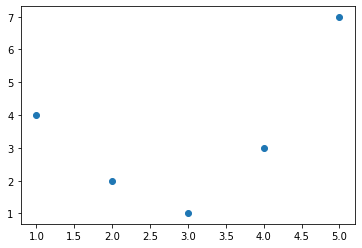

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

> Still, we can fit a line to the data using ``LinearRegression`` and get the optimal result:

我们仍然可以使用`LinearRegression`将直线拟合到数据上：

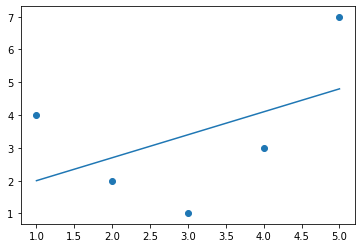

In [12]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

> It's clear that we need a more sophisticated model to describe the relationship between $x$ and $y$.

很显然我们需要更加复杂的模型来描述x和y之间的关系。

> One approach to this is to transform the data, adding extra columns of features to drive more flexibility in the model.
For example, we can add polynomial features to the data this way:

一种方案是转换数据，通过增加额外的特征列来增加模型的灵活性。例如，我们可以如下方式增加多项式特征：

In [13]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


> The derived feature matrix has one column representing $x$, and a second column representing $x^2$, and a third column representing $x^3$.
Computing a linear regression on this expanded input gives a much closer fit to our data:

派生的矩阵中第一列代表$x$，第二列代表$x^2$，第三列代表$x^3$。在这个扩增输入上计算得到的线性回归得到对数据更好的一个拟合：

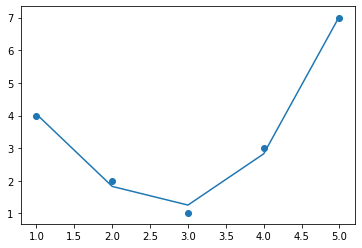

In [14]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

> This idea of improving a model not by changing the model, but by transforming the inputs, is fundamental to many of the more powerful machine learning methods.
We explore this idea further in [In Depth: Linear Regression](05.06-Linear-Regression.ipynb) in the context of *basis function regression*.
More generally, this is one motivational path to the powerful set of techniques known as *kernel methods*, which we will explore in [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb).

上面这种不通过改变模型本身而是通过转换输入数据的方法，是很多强大的机器学习算法的基础。我们会在[深入：线性回归](05.06-Linear-Regression.ipynb)一节中在*基础函数回归*部分更加详细的讨论它。更普遍的情况下，这种方法属于一组强大的被称为*核方法*的行动步骤的一部分，我们会在[深入：支持向量机](05.07-Support-Vector-Machines.ipynb)中深入讨论它们。

## Imputation of Missing Data

## 缺失数据插值

> Another common need in feature engineering is handling of missing data.
We discussed the handling of missing data in ``DataFrame``s in [Handling Missing Data](03.04-Missing-Values.ipynb), and saw that often the ``NaN`` value is used to mark missing values.
For example, we might have a dataset that looks like this:

特征工程中还有一个普遍需求是处理缺失数据。我们在`DataFrame`的[处理缺失数据](03.04-Missing-Values.ipynb)一节中讨论过它，而且我们也知道通常我们使用`NaN`来代表缺失值。例如我们有如下的数据集：

In [15]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

> When applying a typical machine learning model to such data, we will need to first replace such missing data with some appropriate fill value.
This is known as *imputation* of missing values, and strategies range from simple (e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data).

如果我们想要将典型机器学习模型应用到这个数据上时，我们需要首先将缺失数据填充上值。这被成为缺失数据的*插值*，它的策略从简单（例如使用列均值填充缺失值）到复杂（例如使用矩阵补全或一个健壮的模型来处理这些数据）都有。

> The sophisticated approaches tend to be very application-specific, and we won't dive into them here.
For a baseline imputation approach, using the mean, median, or most frequent value, Scikit-Learn provides the ``Imputer`` class:

复杂的方法一般都是应用场景相关的，我们在这里不会深入研究它们。对于插值的基础方法，如使用均值、中位数或最常见值，Scikit-Learn提供了`Imputer`类：

译者注：`Imputer`类已经过时，0.22版本会被移除，下面使用了`sklearn.impute.SimpleImputer`替换了原代码中的`Imputer`。

In [17]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

> We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. This imputed data can then be fed directly into, for example, a ``LinearRegression`` estimator:

我们可以从结果看到，两个缺失值被替换成了该列的平均值。处理完后的数据就能直接被传递给评估器模型处理，例如线性回归`LinearRegression`：

In [18]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Feature Pipelines

## 特征管道操作

> With any of the preceding examples, it can quickly become tedious to do the transformations by hand, especially if you wish to string together multiple steps.
For example, we might want a processing pipeline that looks something like this:

> 1. Impute missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

看完前面的例子之后，如果每次我们都要手动处理特征并且实例化模型的话，这项工作会变得很乏味，尤其是如果你希望将多个步骤串联在一起的情况下。例如我们可能希望按顺序完成下列任务：

1. 使用均值插入缺失值
2. 将特征转换为二阶多项式
3. 选择和实例化线性回归模型

> To streamline this type of processing pipeline, Scikit-Learn provides a ``Pipeline`` object, which can be used as follows:

你可以将这些操作使用管道连接起来，Scikit-Learn提供了一个`Pipeline`对象，使用方式如下：

In [19]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                      PolynomialFeatures(degree=2),
                      LinearRegression())

> This pipeline looks and acts like a standard Scikit-Learn object, and will apply all the specified steps to any input data.

管道对象看起来就像标准的Scikit-Learn对象一样，它能将其中的所有操作步骤应用在（拟合）任意数据数据。

In [20]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


> All the steps of the model are applied automatically.
Notice that for the simplicity of this demonstration, we've applied the model to the data it was trained on; this is why it was able to perfectly predict the result (refer back to [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) for further discussion of this).

所有的模型操作步骤都会自动被应用。注意这里为了简单起见，我们将模型预测应用到了训练它的数据上；这也是为什么模型能完美的预测结果的原因（参见[超参数和模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb)）。

> For some examples of Scikit-Learn pipelines in action, see the following section on naive Bayes classification, as well as [In Depth: Linear Regression](05.06-Linear-Regression.ipynb), and [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb).

要学习更多Scikit-Learn管道的实际例子，参看接下来的小节朴素贝叶斯分类，以及[深入：线性回归](05.06-Linear-Regression.ipynb)和[深入：支持向量机](05.07-Support-Vector-Machines.ipynb)。

<!--NAVIGATION-->
< [超参数及模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb) | [目录](Index.ipynb) | [深入：朴素贝叶斯分类](05.05-Naive-Bayes.ipynb) >

<a href="https://colab.research.google.com/github/wangyingsm/Python-Data-Science-Handbook/blob/master/notebooks/05.04-Feature-Engineering.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
